In [2]:
%pylab inline
import numpy as np
# f = open('/home/nicola/Torcs_py/loss2.log', 'r')
# f2 = open('/home/nicola/ultimate tst/DDPG-Keras-Torcs/reward_lui.log', 'r')
# a = np.array([float(n) for n in f.read().split()])
# a2 = np.array([float(n) for n in f2.read().split()])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


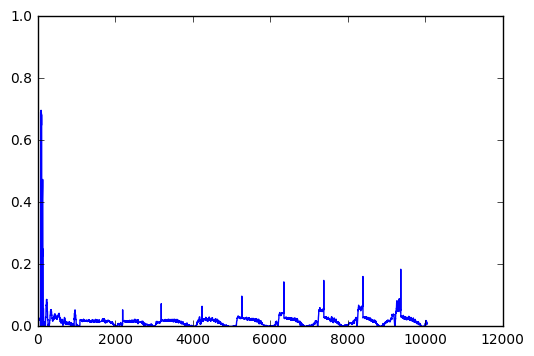

In [92]:
k = 50.0
l = []
for i in range(int(a.shape[0]/k)):
    l.append(np.mean(a[i*k:k*i+k]))

#plt.plot(range(len(l)), l, '.', alpha=0.3)
plt.ylim(0,1)
plt.plot(range(a.shape[0]), a, '-', color='blue')

#plt.plot(range(a2.shape[0]), a2, '.', alpha=0.3, color='red')

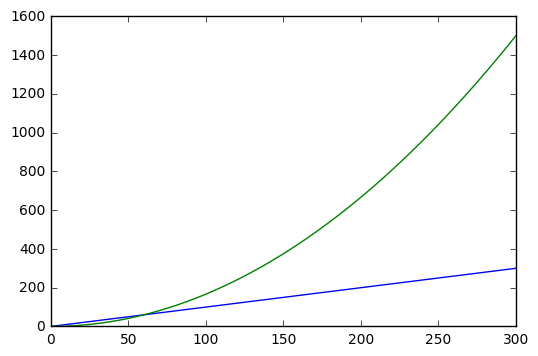

In [17]:
x = np.linspace(0,1, 100)
plt.plot(x*300, x*300)
plt.plot(x*300, np.array([e**2 for e in x])*1500)